## Großes Projekt "Netzwerflussproblem"
#### Alexander M. Westphal, Klaus Riedl, Robert Taglauer

In [38]:
import numpy as np
from scipy.optimize import linprog
from numpy.linalg import solve
import numpy as np
from operator import itemgetter






In [39]:
graphDic = {} #Dic with Graph info

def getGraph():
    ''' Getter for the Graph '''
    return graphDic

def setGraph(newGraph):
    ''' Setter for the Graph '''
    graphDic = newGraph
    
def getValuetoKey(param):
    ''' Method to return a Value by a Key '''
    return graphDic[param] if param in graphDic else None

def isInDic(KEY):
    return True if KEY in graphDic else False

def getCostVector():
    ''' Method to get the Costvector '''
    costVector = []
    for i in getGraph().itervalues():
        for k in i:
            costVector.append(k[1])
    return costVector
   
def getCapacityVector():
    ''' Method to get the Capacityvector '''
    costVector = []
    for i in getGraph().itervalues():
        for k in i:
            costVector.append(k[2])
    return costVector



In [31]:
def getInput(param):
    ''' Method to recieve an vector as Input and put it into the Datastructure'''
    try:
        if isInDic(param[0]):
            para = getValuetoKey(param[0]) if getValuetoKey(param[0]) != None else [] 
            para.append(param[1:])
            getValuetoKey(param[0]).sort()
        else: setGraph(getGraph().update({param[0]:[param[1:]]}))
    finally: print(getGraph())



##  Input:
#### Vektor eingaben:
##### Beispiel: [Start, Ziel, Kosten, Kapazität]

In [32]:
#getInput([1,3,3,4])
getInput([1,2,2,5])
getInput([1,3,3,4])
getInput([2,4,3,6])
getInput([3,2,0,3])
getInput([3,4,1,2])
getInput([3,5,2,3])
getInput([4,5,1,np.inf])
getInput([4,6,3,4])
getInput([5,6,5,5])

{1: [[2, 2, 5]]}
{1: [[2, 2, 5], [3, 3, 4]]}
{1: [[2, 2, 5], [3, 3, 4]], 2: [[4, 3, 6]]}
{1: [[2, 2, 5], [3, 3, 4]], 2: [[4, 3, 6]], 3: [[2, 0, 3]]}
{1: [[2, 2, 5], [3, 3, 4]], 2: [[4, 3, 6]], 3: [[2, 0, 3], [4, 1, 2]]}
{1: [[2, 2, 5], [3, 3, 4]], 2: [[4, 3, 6]], 3: [[2, 0, 3], [4, 1, 2], [5, 2, 3]]}
{1: [[2, 2, 5], [3, 3, 4]], 2: [[4, 3, 6]], 3: [[2, 0, 3], [4, 1, 2], [5, 2, 3]], 4: [[5, 1, inf]]}
{1: [[2, 2, 5], [3, 3, 4]], 2: [[4, 3, 6]], 3: [[2, 0, 3], [4, 1, 2], [5, 2, 3]], 4: [[5, 1, inf], [6, 3, 4]]}
{1: [[2, 2, 5], [3, 3, 4]], 2: [[4, 3, 6]], 3: [[2, 0, 3], [4, 1, 2], [5, 2, 3]], 4: [[5, 1, inf], [6, 3, 4]], 5: [[6, 5, 5]]}


In [36]:

matrixInd=np.zeros((2,2))
ziel = vector([])


maxPoint=0
anzahlPoint=0
def getConnections():
    connections = []
    for i in getGraph():
        for x in getValuetoKey(i):
            connections.append((i,x[0]))
    return connections

def getConnectionsForPlott():
    connections = {}
    for i in getGraph():
        connectedTo = []
        for c in getValuetoKey(i):
            connectedTo.append(c[0])
        connections.update({i:connectedTo})
    return connections

def generateMatrix(tmp):
    global matrixInd,rows,column,maxPoint,anzahlPoint,testm,null,ziel
    A=np.zeros((maxPoint,anzahlPoint))
    B=np.zeros((maxPoint,anzahlPoint+1))
    for i in range(0,maxPoint): 
        for a in range(0,anzahlPoint): 
            if(tmp[a][0]==i+1):
                A[i][a]=1
                B[i][a]=1
            elif(tmp[a][1]==i+1):
                A[i][a]=-1
                B[i][a]=-1
            else:
                A[i][a]=0
                B[i][a]=0
    B[0][anzahlPoint]=-1
    B[maxPoint-1][anzahlPoint]=1
    matrixInd=A
    testm=B
    
    
def findMaxPoint(con):
    global maxPoint,anzahlPoint
    anzahlPoint=len(con)
    maxPoint=max(t[0] for t in con)
    if(maxPoint<max(t[1] for t in con)):
        maxPoint=max(t[1] for t in con)
    return
 
maxTrans=getCapacityVector()
kosten=getCostVector()
con =getConnections()
print(con)
findMaxPoint(con)
generateMatrix(con)
print(getConnectionsForPlott())


[(1, 2), (1, 3), (2, 4), (3, 2), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)]
{1: [2, 3], 2: [4], 3: [2, 4, 5], 4: [5, 6], 5: [6]}


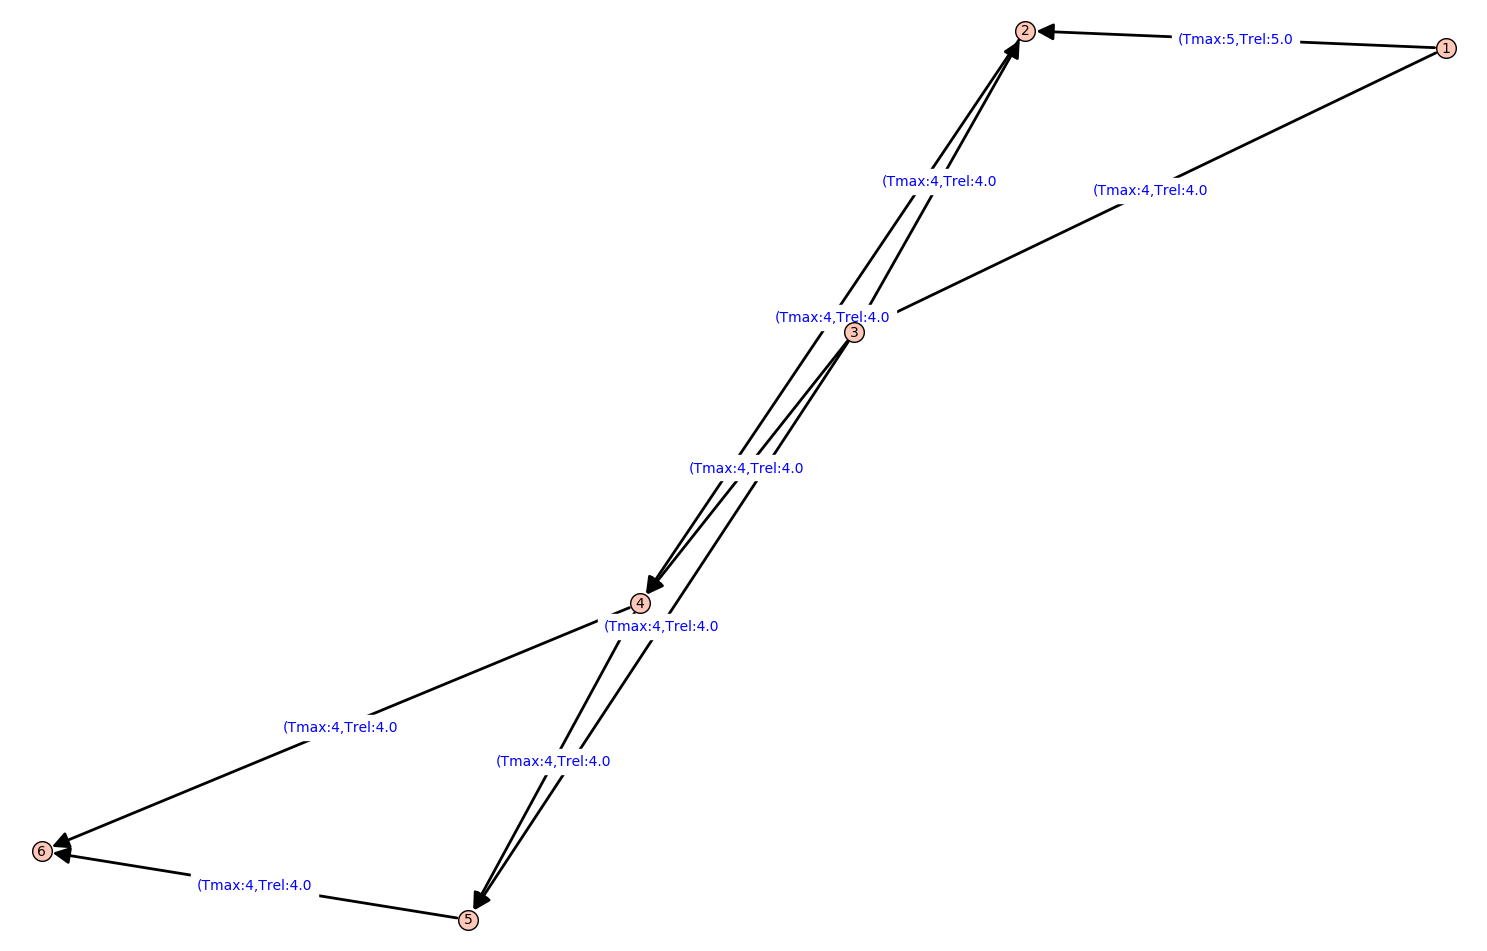

Maximalerfluss: 9.0


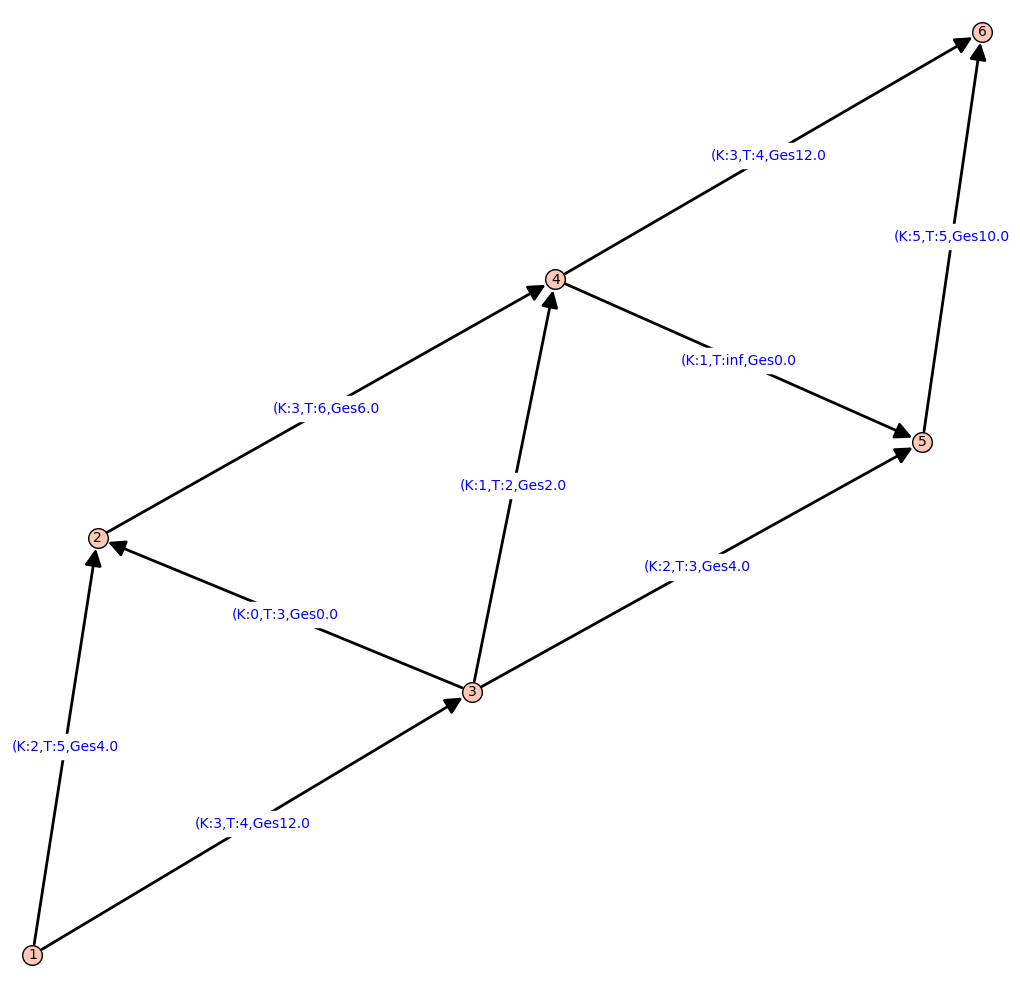

Gesamtkosten: 50.0


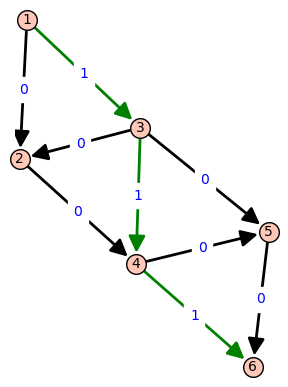

Gesamtkosten: 7.0


     fun: 7.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([1., 0., 1., 1., 0., 1., 1., 0., 1.])
  status: 0
 success: True
       x: array([0., 1., 0., 0., 1., 0., 0., 1., 0.])

In [37]:
def plottMinkost(minik,minKost,entscheid):
    ''' Method to Plot the min-cost'''
    D = DiGraph(getConnectionsForPlott(), loops=True)
    d ={0: "black", 1: "green"}
    i=0
    if(entscheid):
        for u,v,l in D.edges():
            D.set_edge_label(u,v,0 if minik.item(i)==0 else 1)
            i=i+1
        D.graphplot(edge_labels=True,edge_colors=D._color_by_label(d)).show()
        print("Gesamtkosten: "+ str(minKost.get('fun')))
    else:
        for u,v,l in D.edges():
            D.set_edge_label(u,v,'(K:' + str(kosten[i]) + ',T:'+ str(maxTrans[i]) + ',Ges' + str((kosten[i]*minik.item(i))))
            i=i+1
        D.graphplot(edge_labels=True).show(figsize =15)
        print("Gesamtkosten: "+str(minKost.get('fun')))
        
def plotMaxFluss(maxif,maxFluss):
    ''' Method to Plot the Maxflow '''
    i=0
    d={0: "black", 1: "green"}
    D = DiGraph(getConnectionsForPlott(), loops=false)
    for u,v,l in D.edges():
        D.set_edge_label(u,v,'(Tmax:'+ str(maxTrans[i]) + ',Trel:' + str(maxif.item(i)))
        i=+1
    D.graphplot(edge_labels=True).show(figsize =15)
    print("Maximalerfluss: "+str(maxFluss.get('fun')*-1))
        

        
#Berrechnet den Maximalen Fluss mithilfe scipy bibiliothek 
def maxflussMitKapa(zielMenge,traVec,indMatrix):
    ''' Method calculate the the max cost depending on kapacitiy or not
        @param zielmenge Max Amount of things to transport
        @param traVec Tranpsort-Vector max amount of things can be transported
        @param kostVec Cost-Vector reprasenting the cost for a path
        @indMatrix inzidenzmatirx
    '''

    
    size=len(traVec)
    
    knoten = np.size(indMatrix,0)
    
    A = indMatrix #Inzidenzmatrix
    c=np.zeros(size+1)#c zu minimieren
    c[size]= (-1) # nullvektor mir letzten eintrag der für x6,1 steht -1 da wir keine festen input werte haben 
    
    b=np.zeros(knoten) #nullvektor um sicher zu stelle das wir eine lösung erhalten wo wir sicher sind das alles von der Sekante zu Quelle auch wieder zur Sekannte kommt 
    l=np.zeros(size+1)#lower bound -> 0 <= x
    u = np.array(traVec) #max transport x <= u
    u =np.append(u,np.inf) #max trans,+inf -> wegen eingefügten Kante von Sekante zur Quelle
    lb = l #lower bound for x array
    ub = u #upper bound for x array
    maxFluss = linprog(c, A_ub=A, b_ub=b,bounds=list(zip(lb,ub )))
    maxif=maxFluss.get('x')
    plotMaxFluss(maxif,maxFluss)
    return maxFluss
    

def minKostMitKapa(zielMenge,traVec,kostVec,indMatrix,entscheid):
    ''' Method calculate the the min cost depending on kapacitiy or not
        @param entscheid whether the function should consider the Capacity or not
        @param zielmenge Max Amount of things to transport
        @param traVec Tranpsort-Vector max amount of things can be transported
        @param kostVec Cost-Vector reprasenting the cost for a path
        @indMatrix inzidenzmatirx
    '''
    size=len(traVec)
   
    #entscheiden minkosten unabhänig von Transport Kapazität oder mit
    if(entscheid):#wenn ich die kosten von einer Menge herrausfinden will
        zm=1#1 als zielmenge festlegen da wir nur an den kosten von einem Durchgang interessiert sind 
        r = np.arange(size)
        a =[]
        for x in r:
            a.append(1)
            u=a #u auf einservektor setzten um zu sichern das alle Kanten zugänglich sind 
                #auf 2 setzten oder höher nicht notwendig da ein rücksprung nur höhere Kosten verursachen würde
    else:
        zm=zielMenge#zielmenge wie übergeben
        u = np.array(traVec) #max transport x <= u 
    knoten=np.size(indMatrix,0) #anzahl der knoten

    A = indMatrix #Inzidenzmatrix
    c=np.array(kostVec)#zu minimiere -> hier Kostenvektor 
    b=np.zeros(knoten) # vektor erstes element zm und letztes zm -> da wir einen fest geschriebenen Input haben
    b[knoten-1]= (-zm)
    b[0]= (zm)

    l=np.zeros(size) #lower bound -> 0 <= x

    lb = l #lower bound for x array
    ub = u #upper bound for x array
    minKost = linprog(c, A_eq=A, b_eq=b,bounds=list(zip(lb,ub )))
   # plottMinkost()
    minik=minKost.get('x')
    plottMinkost(minik,minKost,entscheid)
    plottMinkost
    return minKost 
    

maxflussMitKapa(6,maxTrans,testm)
minKostMitKapa(6,maxTrans,kosten,matrixInd,false)
minKostMitKapa(6,maxTrans,kosten,matrixInd,true)
